# Investigating TMDb Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb, or The Movie Database, is a site like IMDb, in that it is a crowd-sourced database for movie information. This dataset contains information for about 10,000 movies, including user ratings, budget, genre, etc. Each movie in the dataset has a popularity score, which, accoding to The Movie Database API, is an aggregation of a number of factors such as the amount of votes per day, views per day, and users who marked it as a "favorite." Another item to note about the dataset is that there are variables named "budget," "revenue," "budget_adj," and "revenue_adj." The latter variables are the values of the former, adjusted for inflation, so they will be used instead of the former in this analysis.

This project will investigate the following questions:
- What were the most popular movies each year? The highest rated by users?
- How does revenue differ for animated versus non-animated movies?

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties of the Dataset

In [2]:
#Importing the TMDb dataset and turning it into a Pandas dataframe
movie_db = pd.read_csv("tmdb-movies.csv")
movies_df = pd.DataFrame(movie_db)
movies_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

The dataset was turned into a Pandas dataframe, making it easier to work with when running analyses. The first ten rows give us a glimpse of the dataset.

Looking at the numerical columns, you may notice that some of the numbers are in scienfific notation. The following code will make those values easier to read by making more digits visible.

In [3]:
#This code was obtained from https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
pd.options.display.float_format = '{:20,.5f}'.format

In [4]:
movies_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,"137,999,939.28003","1,392,445,892.52380"
1,76341,tt1392190,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,"137,999,939.28003","348,161,292.48903"
2,262500,tt2908446,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,"101,199,955.47202","271,619,025.40763"
3,140607,tt2488496,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,"183,999,919.04004","1,902,723,129.80182"
4,168259,tt2820852,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,"174,799,923.08803","1,385,748,801.47052"
5,281957,tt1663202,9.11070,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20000,2015,"124,199,945.35202","490,314,247.02173"
6,87101,tt1340138,8.65436,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80000,2015,"142,599,937.25603","405,355,075.68377"
7,286217,tt3659388,7.66740,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60000,2015,"99,359,956.28162","547,749,654.31015"
8,211672,tt2293640,7.40416,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50000,2015,"68,079,970.04481","1,064,192,016.79551"
9,150540,tt2096673,6.32680,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices

Let's examine the data types to make sure all columns are in the format they should be

In [5]:
print(movies_df.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


All looks good. Let's move on to the data cleaning process.

### Data Cleaning 

Let's look for any oddities in the data using the "describe" function on some of the numerical columns.

In [6]:
movies_df['budget_adj'].describe()

count           10,866.00000
mean        17,551,039.82289
std         34,306,155.72284
min                  0.00000
25%                  0.00000
50%                  0.00000
75%         20,853,251.08440
max        425,000,000.00000
Name: budget_adj, dtype: float64

In [7]:
movies_df['revenue_adj'].describe()

count           10,866.00000
mean        51,364,363.25325
std        144,632,485.03997
min                  0.00000
25%                  0.00000
50%                  0.00000
75%         33,697,095.71731
max      2,827,123,750.41189
Name: revenue_adj, dtype: float64

Running the two cells above yields surprising results. We can see that the budget and revenue columns both not only have minimum values of 0 but also have 0 as their first and second quartiles. This means that half the data have values of 0. In other words, about half of the movies in each dataset have no budgets or revenues.

Looking into some discussion on Kaggle surrounding this dataset, it seems that a 0 in both of those columns is used to indicate that there is no data available. Therefore, the next step in the process is to convert any zeros to NaN, or "Not a Number" values. This makes it easier to perform functions on the entire column, such as mean or standard deviation. The "NaN" values will now be ignored.

In [8]:
def remove_zeros(data):
    """Converts all zeros in a column to 'NaN'"""
    if data == float(0):
        data = float('NaN')
    return(data)

movies_df['budget_adj'] = movies_df['budget_adj'].apply(remove_zeros)
movies_df['revenue_adj'] = movies_df['revenue_adj'].apply(remove_zeros)

In [9]:
movies_df[['budget_adj','revenue_adj']][:50]

,budget_adj,revenue_adj
0,"137,999,939.28003","1,392,445,892.52380"
1,"137,999,939.28003","348,161,292.48903"
2,"101,199,955.47202","271,619,025.40763"
3,"183,999,919.04004","1,902,723,129.80182"
4,"174,799,923.08803","1,385,748,801.47052"
5,"124,199,945.35202","490,314,247.02173"
6,"142,599,937.25603","405,355,075.68377"
7,"99,359,956.28162","547,749,654.31015"
8,"68,079,970.04481","1,064,192,016.79551"
9,"160,999,929.16003","785,411,574.69891"


Looking at the first 50 rows, we are able to see that a few values in the budget_adjusted and revenue_adjusted have been converted from 0 to NaN. 

Now it's time to check out the statistics for some of the other variables: popularity, runtime, vote_average, and release_year.

In [10]:
movies_df['popularity'].describe()

count           10,866.00000
mean                 0.64644
std                  1.00018
min                  0.00007
25%                  0.20758
50%                  0.38386
75%                  0.71382
max                 32.98576
Name: popularity, dtype: float64

In [11]:
movies_df['runtime'].describe()

count           10,866.00000
mean               102.07086
std                 31.38141
min                  0.00000
25%                 90.00000
50%                 99.00000
75%                111.00000
max                900.00000
Name: runtime, dtype: float64

The minimum runtime of the data is 0 minutes, which does not make sense, unless the movie never aired. To investigate this, we can look at the entries for all columns with a runtime of zero.

In [12]:
movies_df[movies_df.runtime == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.87604,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.40000,2015,nan,nan
334,361931,tt5065822,0.35765,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.50000,2015,nan,nan
410,339342,tt2948712,0.09751,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.60000,2015,nan,nan
445,353345,tt3800796,0.21853,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.00000,2015,nan,nan
486,333653,tt4058368,0.17674,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.40000,2015,nan,nan
595,341051,tt2914740,0.02873,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.60000,2015,nan,nan
616,325843,tt4333210,0.02680,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.60000,2015,nan,nan
1241,296370,tt3024964,0.13538,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.70000,2014,nan,nan
1289,286372,tt1791681,0.03746,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.40000,2014,"2,993,545.91501",nan
1293,286256,tt3134058,0.03690,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.00000,2014,nan,nan


After looking up a few of these movies on Google, it looks like they all have normal runtimes. Instead, 0 was most likely used to indicate that the data was missing. Most of these values have missing budget and revenue values too, which makes things consistent.

There are few movies in this slice of the data that have a budget value but no revenue value, which might lead one to think that the movie never aired. However, after looking into these few data points, it looks as if these movies did air.

Now that we understand what those zeros mean, it is time to use the remove_zeros function, created above, on the runtime column. 

In [13]:
movies_df['runtime'] = movies_df['runtime'].apply(remove_zeros)

Now that the zeros have been removed, let's check the runtime column for any other weird values. The following code finds all entries with a runtime less than ten minutes, as it would be strange to find a feature film or a documentary shorter than this.

In [14]:
movies_df[movies_df.runtime < 10].head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
100,326359,tt4007502,1.72471,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8.00000,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.00000,2015,nan,nan
216,286192,tt3824386,0.64015,0,0,Lava,Napua Greig|Kuana Torres Kahele,http://www.pixar.com/short_films/Theatrical-Sh...,James Ford Murphy,NaN,...,The story follows the love story of two volcan...,7.00000,Animation|Comedy|Family|Fantasy|Music,Pixar Animation Studios,6/19/15,298,7.30000,2015,nan,nan
279,355338,tt4941804,0.44284,0,0,Riley's First Date?,Amy Poehler|Phyllis Smith|Bill Hader|Lewis Bla...,NaN,Josh Cooley,NaN,...,"Riley, now 12, is hanging out at home with her...",5.00000,Animation|Family,Walt Disney Pictures|Pixar Animation Studios,11/3/15,137,7.30000,2015,nan,nan
343,366142,tt5223342,0.34499,0,0,Minions: The Competition,Pierre Coffin|Chris Renaud,NaN,Kyle Balda|Julien Soret,NaN,...,Two minions working in a bomb lab get competit...,4.00000,Animation,Illumination Entertainment,11/4/15,16,5.90000,2015,nan,nan
371,345637,tt4661600,0.42290,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7.00000,Animation,Pixar Animation Studios,11/25/15,47,6.90000,2015,nan,nan
456,367326,tt5184298,0.20849,0,0,Cosmic Scrat-tastrophe,Chris Wedge|Ray Romano|John Leguizamo|Denis Leary,NaN,Mike Thurmeier|Galen T. Chu,NaN,...,Scrat struggles once again to protect his nut.,5.00000,Science Fiction|Comedy|Animation|Family,Twentieth Century Fox Film Corporation|Blue Sk...,11/6/15,33,7.70000,2015,nan,nan
600,332479,tt4550996,0.04726,0,0,Star Wars: TIE Fighter,NaN,https://www.youtube.com/watch?v=PN_CP4SuoTU,Paul Johnson,"star wars, Tie Fighter, anime",...,Paul â€œOtaKingâ€ Johnson drops a real treat i...,7.00000,Science Fiction|Action|Animation,NaN,3/24/15,29,7.60000,2015,nan,nan
826,293299,tt3689498,0.70570,0,0,Feast,Tommy Snider|Katie Lowes|Ben Bledsoe|Stephen A...,NaN,Patrick Osborne,Pet is not just a pet,...,This Oscar-winning animated short film tells t...,6.00000,Romance|Comedy|Animation|Drama|Family,Walt Disney Animation Studios,11/7/14,318,8.00000,2014,nan,nan
1097,256346,tt3597380,0.21986,0,0,Almost Home,Steve Martin|Tom McGrath|David Soren,NaN,Todd Wilderman,NaN,...,A group of aliens searching for a new planet o...,4.00000,Adventure|Animation|Science Fiction,DreamWorks Animation,2/1/14,45,6.80000,2014,nan,nan
1112,264170,tt3643208,0.20278,0,0,Batman: Strange Days,Kevin Conroy|Brian George|Tara Strong,NaN,Bruce Timm,NaN,...,"Celebrating Batmanâ€™s 75th anniversary, DC En...",3.00000,Action|Animation,DC Comics,4/9/14,20,7.60000,2014,nan,nan


After skimming through some of the entries, it becomes apparent that the films with runtimes less than ten minutes but not NaN are mostly short films or specials, so there is nothing to change about them.

Let's finish examining the numerical columns for any more issues.

In [15]:
movies_df['vote_average'].describe()

count           10,866.00000
mean                 5.97492
std                  0.93514
min                  1.50000
25%                  5.40000
50%                  6.00000
75%                  6.60000
max                  9.20000
Name: vote_average, dtype: float64

In [16]:
movies_df['release_year'].describe()

count           10,866.00000
mean             2,001.32266
std                 12.81294
min              1,960.00000
25%              1,995.00000
50%              2,006.00000
75%              2,011.00000
max              2,015.00000
Name: release_year, dtype: float64

Neither of these columns seem to have any issues.

### Missing Values
Now that we have dealt with strange values in the data, let's look at how many values are actually missing in the dataframe

In [17]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10835 non-null float64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj             

From the information retrieved about the dataframe above, we can see that there are 10,866 entries in the table, which means that variables with 10,866 "non-null" values have no missing values (not counting the ones we have changed from zero to NaN). Luckily for us, all variables that we will be dealing with, other than genre, have no missing values. For genre, we will leave the column as is, since it does not make sense to attempt to fill in missing values for a variable like this.

<a id='eda'></a>
## Exploratory Data Analysis

### Which movies were the most popular each year? The highest rated by users? 

Before we answer these questions, let's get a sense of the "popularity" and "vote_average" variables by looking at their distributions.

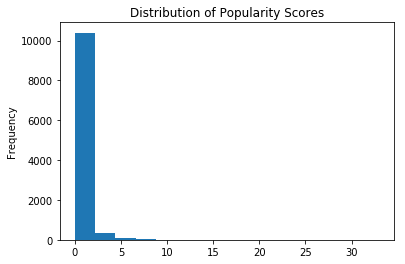

In [18]:
movies_df['popularity'].plot(kind = "hist", title = "Distribution of Popularity Scores", bins = 15, rwidth = 1)

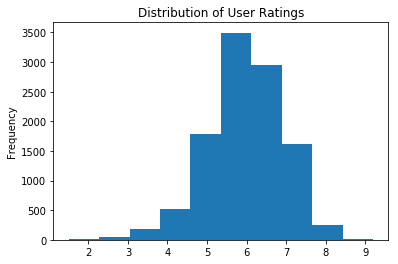

In [19]:
movies_df['vote_average'].plot(kind = "hist", title = "Distribution of User Ratings")

We can already see that the distribution for user ratings looks about normal while the distribution for popularity scores is highly positively skewed.

Now, let's move on to our question. The first step in finding the most popular and highest rated movies is grouping the dataset by year.

In [20]:
movies_by_year = movies_df.groupby('release_year')

The follwing code displays a chart of the most popular movies for each year.

In [21]:
movies_df.iloc[movies_by_year.popularity.idxmax()][['release_year','original_title']]

,release_year,original_title
10141,1960,Psycho
10110,1961,One Hundred and One Dalmatians
9849,1962,Dr. No
10438,1963,From Russia With Love
9881,1964,Goldfinger
10689,1965,Thunderball
10820,1966,How the Grinch Stole Christmas!
10398,1967,The Jungle Book
9719,1968,2001: A Space Odyssey
10724,1969,On Her Majesty's Secret Service


All three Lord of the Rings movies topped the list in their respective years!

The following code does the same for highest rated movies by users.

In [22]:
movies_df.iloc[movies_by_year.vote_average.idxmax()][['release_year','original_title']]

,release_year,original_title
10141,1960,Psycho
10131,1961,"One, Two, Three"
9852,1962,To Kill a Mockingbird
10441,1963,Charade
9882,1964,Dr. Strangelove or: How I Learned to Stop Worr...
10693,1965,A Charlie Brown Christmas
10842,1966,Winnie the Pooh and the Honey Tree
10402,1967,Bonnie and Clyde
9719,1968,2001: A Space Odyssey
10736,1969,Kes


We can see that there are differences between the movies with highest popularity scores for each year and highest user rating for each year.

To test if these variables are all that different, lets plot a line between them to see if there is any visible relationship.

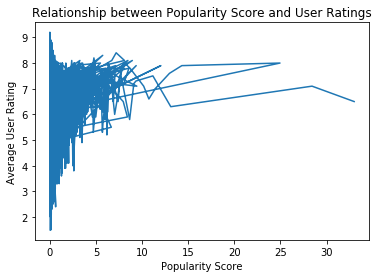

In [23]:
plt.plot(movies_df.popularity,movies_df.vote_average)
plt.xlabel('Popularity Score')
plt.ylabel('Average User Rating')
plt.title('Relationship between Popularity Score and User Ratings')
plt.show()

It appears that these are two very different variables, as no linear relationship is shown.

Let's look at the correlation between the two variables to verify this finding.

In [24]:
data = movies_df[['popularity', 'vote_average']]
data.corr(method = 'pearson')

,popularity,vote_average
popularity,1.00000,0.20951
vote_average,0.20951,1.00000


A correlation of 0.21 is not very strong. Our results were correct.

### How does revenue differ for animated versus non animated movies?

In order to compare the revnues for each, we want to first split the dataset into two pieces: animated movies and non-animated movies. We do so by checking to see if the "genres" column contains the string "Animated" and conduct the split accordingly.

In [25]:
animated_movies = []
non_animated_movies = []

for i in range(len(movies_df)):
    if "Animation" in str(movies_df.iloc[i]['genres']):
        animated_movies.append(movies_df.iloc[i])
    else:
        non_animated_movies.append(movies_df.iloc[i])

Let's look at the first five elements of the animated movie list to see how it is structured.

In [26]:
animated_movies[:5]

[id                                                                 211672
 imdb_id                                                         tt2293640
 popularity                                                        7.40416
 budget                                                           74000000
 revenue                                                        1156730962
 original_title                                                    Minions
 cast                    Sandra Bullock|Jon Hamm|Michael Keaton|Allison...
 homepage                                     http://www.minionsmovie.com/
 director                                         Kyle Balda|Pierre Coffin
 tagline                      Before Gru, they had a history of bad bosses
 keywords                assistant|aftercreditsstinger|duringcreditssti...
 overview                Minions Stuart, Kevin and Bob are recruited by...
 runtime                                                          91.00000
 genres                  

We can see that each element in the list contains all of the data for one animated movie.

Let's make sure we did not lose any movies in the process!

In [27]:
#Print sum of animated movies list length and non-animated movies list length
#Print length of the entire dataframe and see if they are the same.
print(len(animated_movies)+len(non_animated_movies))
print(len(movies_df))

10866
10866


We split the movies correctly!

In order to compare the revenues of the two types of movies, the next step is to simply create lists of the revenues from both categories. This is accomplished by creating a function that finds the all the revenues in a list and applying that function to both movie lists. Remember that here we are looking at adjusted revenue rather than revenue, as it allows us to account for differences due to inflation.

In [28]:
def find_revenues(movie_list):
    """Finds all values for 'revenue_adj' in a movie list"""
    revenue_list = []
    for i in range(len(movie_list)):
        revenue_list.append(movie_list[i]['revenue_adj'])
    return revenue_list

In [29]:
animated_revenues = find_revenues(animated_movies)
non_animated_revenues = find_revenues(non_animated_movies)

In [30]:
print(len(animated_revenues))
print(len(non_animated_revenues))

699
10167


It is easy to see that there are many more elements in the non-animated revenue list than the animated revenue list.

Let's see if any difference in revenue is visible on a scatter plot. We are only looking at the first 699 elements of the non-animated list because we need to have lists of the same length in our plot. The red dots are the animated movies while the blue are the non-animated movies.

Text(0.5,1.08,'Scatterplot of Animated and Non-Animated Revenues')

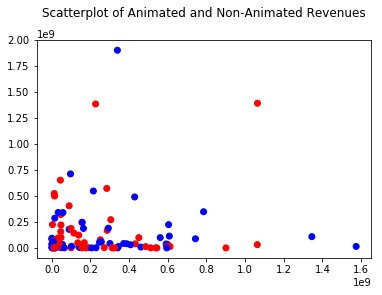

In [31]:
x, y = animated_revenues, non_animated_revenues[:699]
plt.scatter(x, y, color = ['red','blue'])
plt.title("Scatterplot of Animated and Non-Animated Revenues", y = 1.08)

It is hard to see a clear pattern from the graph. It might be better to compare the revenues based on measures of central tendency.

Let's compare the means of both revenue lists, using the function "nanmean" from numpy to discard the NaN's in the columns.

In [32]:
print(np.nanmean(animated_revenues))
print(np.nanmean(non_animated_revenues))

251451614.81816894
108070916.62647282


We see that animated movies are making more than twice the amount of money than non-animated movies. However, median may be a better representation of data in this case, since the difference in size between the two lists of movies can lead to more outliers and variation in the non-animated list, which can have significant effects on the mean. Let's look at how median differes.

In [33]:
print(np.nanmedian(animated_revenues))
print(np.nanmedian(non_animated_revenues))

148579046.595206
42053235.776576206


The difference in medians is even larger, with that of the animated movies being more than three times that of the non-animated movies!

<a id='conclusions'></a>
## Conclusions

This project helped me understand what it means to make the most of dataset. It is very rare that one finds a dataset that is ready for analysis right off the bat. By exploring the oddities in the data, a user gets an understanding of how this dataset was created and what factors might contribute to odd entries.

Once the data was cleaned, it was interesting to use simple Pandas techniques to answer questions I think about all the time but never had the resources to answer. By comparing the movies with the highest popularity score to those with the highest user ratings, it was clear that there was a difference in the two variables. This makes sense because the popularity score is a conglomaration of many different factors while user rating comes from just one source. It was therefore interesting to see that the movie the users preferred was often different than the movie that received the most hype. Additionally, the results of comparing the revenues of animated movies and non-animated movies was intruiging to me because I expected non-animated movies to generate more revenue. I guessed this because many animated movies are watched by younger children and their parents while other movies are usually watched by people of all ages. However, it seems like animated movies generate significantly more revenue. Answering these questions showed me that once the data is cleaned, it usually takes few manipulations to get to the answers of your questions.

It should be noted that there are a couple of limitations to working with this dataset. First, although 10,000 movies are lot to work with, the conclusions found from this project do not have external validity because the database does not contain every movie ever made. This means that the most popular and highest rated movies may be completely different than the ones found if all movies are taken into account. Similarly, revenue of non-animated movies still might be higher than that of animated movies in reality. This project simply gives a glimpse into the patterns that are likely to emerge if a database of every movie ever made somehow became available. In addition, the dataset contained many missing values (including more than half of the budget_adj and revenue_adj columns), which means some of the findings may not be accurate. Still, this project has taught me that with all the data becoming available, the answers to our questions are right at our fingetips. In the future, I would like to take an even larger movies dataset and see if the patterns I found still emerge.

In [34]:
#Generate HTML version of this Jupyter Notebook
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigating TMDb Movies Dataset.ipynb'])

0